<a href="https://colab.research.google.com/github/C23-PS052/Machine-Learning/blob/main/Capstone_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting and Loading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [90]:
files = [file for file in os.listdir('/content/drive/MyDrive/Bangkit/Dataset/')]

In [91]:
df = pd.DataFrame()

In [92]:
for file in files:
    data = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/' + file)
    df = pd.concat([df, data])

# Data Cleaning, Wrangling, and Feature Engineering

In [93]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [94]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

Dataset consisted of 20 type of products. Product with the most data (USB-C Charging Cable) will be used for the initial analysis and modelling

Encoding product name into categorical number

In [95]:
temp_product = set(df["Product"])
product_dict = dict()

i = 0
for x in temp_product:
    product_dict[i]=x
    i+=1

new_dict =  {v: k for k, v in product_dict.items()}

def to_num(s):
    return new_dict[s[1]]

In [96]:
df['Product'] = df.apply(to_num, axis=1)

In [97]:
df['Product'].value_counts()

16    21903
1     21658
4     20641
14    20577
5     18882
15    15549
0     13325
6      7507
17     6842
2      6230
9      6181
20     5525
3      4800
19     4724
13     4128
18     4101
12     2065
10      666
7       646
11      545
8       355
Name: Product, dtype: int64

Converting quantity and price into numerical dtype

In [98]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors="coerce")
df['Price Each'] = pd.to_numeric(df['Price Each'], errors="coerce")

In [99]:
df = df.astype({'Price Each':'float'})

Converting order date into datetime data type with yyyy-mm-dd hh:mm format

In [100]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

Creating new feature, extracting different types of time value from the order date variable for further analysis

In [101]:
df['revenue'] = df['Quantity Ordered'] * df['Price Each']
df['hour'] = df['Order Date'].dt.hour
df['dayofweek'] = df['Order Date'].dt.dayofweek
df['quarter'] = df['Order Date'].dt.quarter
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year
df['dayofyear'] = df['Order Date'].dt.dayofyear
df['dayofmonth'] = df['Order Date'].dt.day
df['weekofyear'] = df['Order Date'].dt.isocalendar().week

Dropping unecessarry feature

In [102]:
df = df.drop(columns=['Order ID', 'Purchase Address'])

In [103]:
data = df

Creating an array to save dataframe from each product

In [104]:
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]

def create_df(data):
  for x in range(0,20):
    temp_df = data.loc[data['Product'] == x+1]
    df_list[x] = temp_df
  return df_list

In [105]:
df_list = create_df(data)

Product number 16 will be used as the initial analysis

In [106]:
df_list[15]

,Product,Quantity Ordered,Price Each,Order Date,revenue,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
17,16,1.0,11.95,2019-08-23 12:54:00,11.95,12.0,4.0,3.0,8.0,2019.0,235.0,23.0,34
21,16,1.0,11.95,2019-08-23 07:34:00,11.95,7.0,4.0,3.0,8.0,2019.0,235.0,23.0,34
22,16,1.0,11.95,2019-08-20 13:26:00,11.95,13.0,1.0,3.0,8.0,2019.0,232.0,20.0,34
47,16,1.0,11.95,2019-08-17 20:12:00,11.95,20.0,5.0,3.0,8.0,2019.0,229.0,17.0,33
58,16,1.0,11.95,2019-08-19 08:10:00,11.95,8.0,0.0,3.0,8.0,2019.0,231.0,19.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13599,16,1.0,11.95,2019-06-11 15:59:00,11.95,15.0,1.0,2.0,6.0,2019.0,162.0,11.0,24
13604,16,1.0,11.95,2019-06-28 18:50:00,11.95,18.0,4.0,2.0,6.0,2019.0,179.0,28.0,26
13605,16,1.0,11.95,2019-06-15 16:56:00,11.95,16.0,5.0,2.0,6.0,2019.0,166.0,15.0,24
13619,16,1.0,11.95,2019-06-22 18:57:00,11.95,18.0,5.0,2.0,6.0,2019.0,173.0,22.0,25


In [107]:
dfInit = df_list[15]

In [108]:
dfInit

,Product,Quantity Ordered,Price Each,Order Date,revenue,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
17,16,1.0,11.95,2019-08-23 12:54:00,11.95,12.0,4.0,3.0,8.0,2019.0,235.0,23.0,34
21,16,1.0,11.95,2019-08-23 07:34:00,11.95,7.0,4.0,3.0,8.0,2019.0,235.0,23.0,34
22,16,1.0,11.95,2019-08-20 13:26:00,11.95,13.0,1.0,3.0,8.0,2019.0,232.0,20.0,34
47,16,1.0,11.95,2019-08-17 20:12:00,11.95,20.0,5.0,3.0,8.0,2019.0,229.0,17.0,33
58,16,1.0,11.95,2019-08-19 08:10:00,11.95,8.0,0.0,3.0,8.0,2019.0,231.0,19.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13599,16,1.0,11.95,2019-06-11 15:59:00,11.95,15.0,1.0,2.0,6.0,2019.0,162.0,11.0,24
13604,16,1.0,11.95,2019-06-28 18:50:00,11.95,18.0,4.0,2.0,6.0,2019.0,179.0,28.0,26
13605,16,1.0,11.95,2019-06-15 16:56:00,11.95,16.0,5.0,2.0,6.0,2019.0,166.0,15.0,24
13619,16,1.0,11.95,2019-06-22 18:57:00,11.95,18.0,5.0,2.0,6.0,2019.0,173.0,22.0,25


In [109]:
dfInit = dfInit.groupby(['dayofyear'])['Quantity Ordered'].sum()

In [110]:
dfInit

dayofyear
1.0       47.0
2.0       36.0
3.0       43.0
4.0       57.0
5.0       30.0
         ...  
361.0    109.0
362.0    102.0
363.0    111.0
364.0    108.0
365.0    103.0
Name: Quantity Ordered, Length: 365, dtype: float64

Splitting dataframe for training and testing

In [111]:
from numpy import asarray
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

In [112]:
n_steps = 5

In [113]:
dfInit = dfInit.values.astype('float32')

In [114]:
X, y = split_sequence(dfInit, n_steps)

In [115]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [116]:
n_test = 365-292
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

# Initial Modelling

In [119]:
model = Sequential()
model.add(LSTM(128, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [120]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/350
9/9 [==============================] - 3s 55ms/step - loss: 427.9913 - mae: 15.7980 - val_loss: 640.1970 - val_mae: 20.9162
Epoch 2/350
9/9 [==============================] - 0s 18ms/step - loss: 154.1012 - mae: 9.6980 - val_loss: 147.1652 - val_mae: 9.3664
Epoch 3/350
9/9 [==============================] - 0s 17ms/step - loss: 126.8183 - mae: 8.8079 - val_loss: 137.4230 - val_mae: 9.3349
Epoch 4/350
9/9 [==============================] - 0s 17ms/step - loss: 118.4103 - mae: 8.6106 - val_loss: 152.1347 - val_mae: 9.9826
Epoch 5/350
9/9 [==============================] - 0s 18ms/step - loss: 114.4687 - mae: 8.5329 - val_loss: 122.3131 - val_mae: 8.8459
Epoch 6/350
9/9 [==============================] - 0s 18ms/step - loss: 107.8377 - mae: 8.1748 - val_loss: 154.2086 - val_mae: 9.3769
Epoch 7/350
9/9 [==============================] - 0s 18ms/step - loss: 108.1906 - mae: 8.0973 - val_loss: 253.0286 - val_mae: 13.2227
Epoch 8/350
9/9 [==============================] - 0s 18ms/

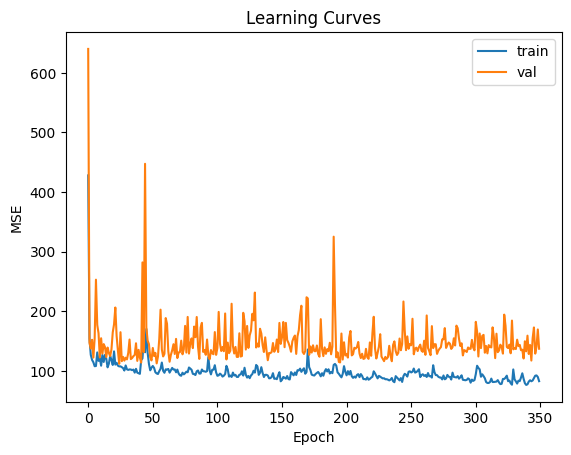

In [121]:
import matplotlib.pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [122]:
from numpy import sqrt
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 137.183, RMSE: 11.713, MAE: 9.454


In [123]:
pred = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [124]:
y_test = y_test.reshape((y_test.shape[0]))

In [125]:
pred = pred.reshape(pred.shape[0])

In [126]:
dic = {'Predictions': pred,'Actual' : y_test, 'Diff': pred - y_test}

In [127]:
pred = pd.DataFrame(data=dic)

In [128]:
pred

,Predictions,Actual,Diff
0,91.374069,89.0,2.374069
1,92.832108,90.0,2.832108
2,91.989464,83.0,8.989464
3,87.752747,74.0,13.752747
4,82.386772,100.0,-17.613228
...,...,...,...
68,106.192749,109.0,-2.807251
69,116.617828,102.0,14.617828
70,110.561012,111.0,-0.438988
71,111.266579,108.0,3.266579


# Model Retraining

Create function to automatically prepare new dataframe for modelling

In [129]:
def new_data(data):
  df = data
  df = df.groupby(['dayofyear'])['Quantity Ordered'].sum()
  df = df.values.astype('float32')

  n_steps = 5
  n_test = 365-292

  X, y = split_sequence(df, n_steps)
  X = X.reshape((X.shape[0], X.shape[1], 1))
  X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

  return X_train, X_test, y_train, y_test

Create model to iterate through df_list and feed it into initial model

In [130]:
def train_new_model(data):
  for x in data:
    try:
      new_data(x)
      model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))
      mse, mae = model.evaluate(X_test, y_test, verbose=0)
      print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
    except IndexError:
      continue
  return model

In [131]:
model = train_new_model(df_list)

Streaming output truncated to the last 5000 lines.
Epoch 305/350
9/9 [==============================] - 0s 31ms/step - loss: 10.0362 - mae: 2.3812 - val_loss: 257.4679 - val_mae: 13.0518
Epoch 306/350
9/9 [==============================] - 0s 27ms/step - loss: 8.9223 - mae: 2.2155 - val_loss: 241.2821 - val_mae: 12.3834
Epoch 307/350
9/9 [==============================] - 0s 27ms/step - loss: 12.4884 - mae: 2.6075 - val_loss: 281.8103 - val_mae: 13.1575
Epoch 308/350
9/9 [==============================] - 0s 28ms/step - loss: 12.8417 - mae: 2.7352 - val_loss: 296.3757 - val_mae: 13.9685
Epoch 309/350
9/9 [==============================] - 0s 28ms/step - loss: 9.6136 - mae: 2.3079 - val_loss: 212.4868 - val_mae: 11.7105
Epoch 310/350
9/9 [==============================] - 0s 27ms/step - loss: 7.9569 - mae: 2.1352 - val_loss: 282.2314 - val_mae: 13.5648
Epoch 311/350
9/9 [==============================] - 0s 28ms/step - loss: 10.1897 - mae: 2.3724 - val_loss: 276.4289 - val_mae: 13.3252


Evaluate accuracy for each product dataframe

In [135]:
rmse_avg = 0
mae_avg = 0
for i in range(0,20):
  try:
    X_train, X_test, y_train, y_test = new_data(df_list[i])
    mse, mae = model.evaluate(X_test, y_test, verbose=0)
    rmse_avg += sqrt(mse)
    mae_avg += mae
    print('Accuracy for product No. %d are MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (i+1, mse, sqrt(mse), mae))
  except IndexError:
    continue
print('Average RMSE for all product is %.3f' % (rmse_avg/20))
print('Average MAE for all product is %.3f' % (mae_avg/20))

Accuracy for product No. 1 are MSE: 307.284, RMSE: 17.530, MAE: 14.246
Accuracy for product No. 2 are MSE: 58.429, RMSE: 7.644, MAE: 6.336
Accuracy for product No. 3 are MSE: 62.444, RMSE: 7.902, MAE: 6.387
Accuracy for product No. 4 are MSE: 820.709, RMSE: 28.648, MAE: 23.157
Accuracy for product No. 5 are MSE: 204.889, RMSE: 14.314, MAE: 11.535
Accuracy for product No. 6 are MSE: 88.086, RMSE: 9.385, MAE: 7.774
Accuracy for product No. 7 are MSE: 96.186, RMSE: 9.807, MAE: 7.697
Accuracy for product No. 9 are MSE: 77.099, RMSE: 8.781, MAE: 7.050
Accuracy for product No. 10 are MSE: 119.469, RMSE: 10.930, MAE: 8.919
Accuracy for product No. 12 are MSE: 55.901, RMSE: 7.477, MAE: 5.308
Accuracy for product No. 13 are MSE: 41.485, RMSE: 6.441, MAE: 5.324
Accuracy for product No. 14 are MSE: 460.343, RMSE: 21.456, MAE: 16.928
Accuracy for product No. 15 are MSE: 133.257, RMSE: 11.544, MAE: 9.297
Accuracy for product No. 16 are MSE: 303.142, RMSE: 17.411, MAE: 13.356
Accuracy for product No

# Model Summary and Visualization

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 77,441
Trainable params: 77,441
Non-trainable params: 0
_________________________________________________________________


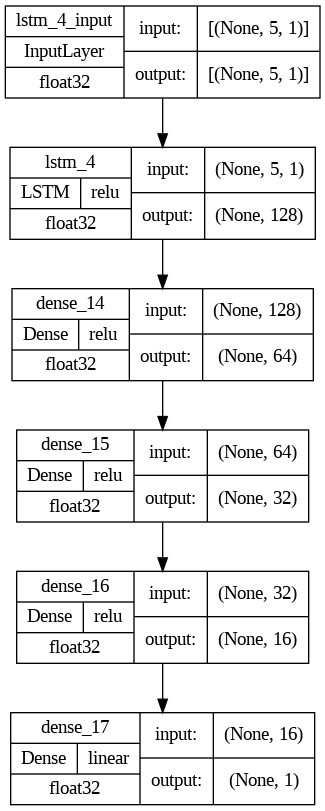

In [141]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True )

In [142]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 25.4 MB/s eta 0:00:00


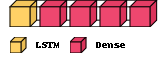

In [144]:
import visualkeras
visualkeras.layered_view(model,legend=True, draw_volume=True)

# Converting into TFLite

In [136]:
tf.keras.models.save_model(model, '/content/drive/MyDrive/Bangkit/Model/model.pbtxt')

In [137]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

In [138]:
model_tflite = converter.convert()

In [139]:
open('/content/drive/MyDrive/Bangkit/Model/LSTMModel_rev1.tflite', 'wb').write(model_tflite)

94240